In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from collections import Counter

In [2]:
## Reading the dataset
books = pd.read_csv(r"Dataset/Books.csv", delimiter=';', on_bad_lines='skip', encoding='ISO-8859-1', low_memory=False)
users = pd.read_csv(r"Dataset/Users.csv", delimiter=';',  on_bad_lines='skip', encoding='ISO-8859-1', low_memory=False)
ratings = pd.read_csv(r"Dataset/Ratings.csv", delimiter=';', on_bad_lines='skip', encoding='ISO-8859-1', low_memory=False)

In [3]:
## Displaying data contents
print("Users Data -> ", users.shape)
print("Books Data -> ", books.shape)
print("Ratings Data -> ", ratings.shape)

Users Data ->  (278858, 3)
Books Data ->  (271360, 8)
Ratings Data ->  (1149780, 3)


In [4]:
## Cleaning Users.csv

In [5]:
users.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [6]:
print("Columns in Users.csv -> ", list(users.columns))

Columns in Users.csv ->  ['User-ID', 'Location', 'Age']


In [7]:
## Null value check
print(users.isna().sum())      

User-ID          0
Location         0
Age         110762
dtype: int64


In [8]:
##Checking all the values present in the Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [9]:
## Taking only the ages between 10 and 90
required = users[users['Age'] <= 90]
required = required[required['Age'] >= 10]

In [10]:
## Calculating mean to use for later substitution
mean = round(required['Age'].mean())   
mean

35

In [11]:
users.loc[users['Age'] > 100, 'Age'] = mean    # The outliers with age > 100 are substituted with mean 
users.loc[users['Age'] < 10, 'Age'] = mean     # The outliers with age < 10 are substitued with mean
users['Age'] = users['Age'].fillna(mean)       # Filling null values with mean
users['Age'] = users['Age'].astype(int)        # Changing the datatype to int

In [12]:
list_ = users.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  # Removing the invalid entries as well
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   # Removing the invalid entries as well 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
users = users.drop('Location',axis=1)

temp = []
for ent in city:
    c = ent.split('/')            # Handling the cases where city/state entries from city list as state is already given 
    temp.append(c[0])

## Seperating the three quantities
df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

print(count_no_country)   #printing the number of countries with no values
print(count_no_state)     #printing the number of states with no values

4659
16044


In [13]:
## Dropping the duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   Age      278858 non-null  int32 
 2   City     278858 non-null  object
 3   State    278858 non-null  object
 4   Country  278858 non-null  object
dtypes: int32(1), int64(1), object(3)
memory usage: 9.6+ MB


In [15]:
users.head(3)

,User-ID,Age,City,State,Country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia


In [16]:
## Cleaning the Books.csv file

In [17]:
print("Columns in Books.csv file -> ", list(books.columns))

Columns in Books.csv file ->  ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


In [18]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [19]:
## Dropping the URL columns
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial


In [20]:
## Checking for null values
books.isnull().sum() 

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [21]:
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [22]:
books.loc[books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [23]:
books.at[187689 ,'Book-Author'] = 'Other'

books.at[128890 ,'Publisher'] = 'Other'
books.at[129037 ,'Publisher'] = 'Other'

In [24]:
## Checking the range of of the years of publication
books['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [25]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [26]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [27]:
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'James Buckley'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = '2003'
books.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [28]:
## Converting year of publication in Numbers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [29]:
## Updated list
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [30]:
## Replacing the Invalid years with max year in the database
count = Counter(books['Year-Of-Publication'])
[k for k, v in count.items() if v == max(count.values())]
books.loc[books['Year-Of-Publication'] > 2022, 'Year-Of-Publication'] = 2022
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2022

In [31]:
## Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

In [32]:
## Dropping the duplicate rows
books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)

In [33]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271047 non-null  object
 1   Book-Title           271047 non-null  object
 2   Book-Author          271047 non-null  object
 3   Year-Of-Publication  271047 non-null  int32 
 4   Publisher            271047 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


In [34]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial


In [35]:
## Cleaning the Ratings.csv dataset

In [36]:
print("Columns in the Ratings.csv file -> ", list(ratings.columns))
ratings.head(3)

Columns in the Ratings.csv file ->  ['User-ID', 'ISBN', 'Book-Rating']


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [37]:
## Checking for null values
ratings.isnull().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [38]:
## Checking whether all ratings are numeric
print(is_numeric_dtype(ratings['Book-Rating']))

True


In [39]:
## Checking whether all User-ID are numeric
print(is_numeric_dtype(ratings['User-ID']))

True


In [40]:
## Checking the validity of ISBN
flag = 0
k =[]
reg = "[^A-Za-z0-9]"

for x in ratings['ISBN']:
    z = re.search(reg,x)    
    if z:
        flag = 1

if flag == 1:
    print("False")
else:
    print("True")

False


In [41]:
## Removing the extra characters from ISBN existing in books dataset
bookISBN = books['ISBN'].tolist() 
reg = "[^A-Za-z0-9]" 
for index, row_Value in ratings.iterrows():
    z = re.search(reg, row_Value['ISBN'])    
    if z:
        f = re.sub(reg,"",row_Value['ISBN'])
        if f in bookISBN:
            ratings.at[index , 'ISBN'] = f

In [42]:
## Uppercasing all the inappropriate alphabets in ISBN
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [43]:
## Dropping the duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

In [44]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149776 entries, 0 to 1149775
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149776 non-null  int64 
 1   ISBN         1149776 non-null  object
 2   Book-Rating  1149776 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [45]:
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [46]:
## Merging the three tables

In [47]:
dataset = pd.merge(books, ratings, on='ISBN', how='inner')
dataset = pd.merge(dataset, users, on='User-ID', how='inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031609 entries, 0 to 1031608
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031609 non-null  object
 1   Book-Title           1031609 non-null  object
 2   Book-Author          1031609 non-null  object
 3   Year-Of-Publication  1031609 non-null  int32 
 4   Publisher            1031609 non-null  object
 5   User-ID              1031609 non-null  int64 
 6   Book-Rating          1031609 non-null  int64 
 7   Age                  1031609 non-null  int32 
 8   City                 1031609 non-null  object
 9   State                1031609 non-null  object
 10  Country              1031609 non-null  object
dtypes: int32(2), int64(2), object(7)
memory usage: 86.6+ MB


In [48]:
## Algorithm Implementation
bookName = '1984'
bookNumber = 5

In [49]:
## Filtering dataset for only non-trivial(non-zero) ratings
dset = dataset[dataset['Book-Rating'] != 0]
dset = dset.reset_index(drop = True)
dset.shape

(384074, 11)

In [50]:
def popularity_based(dataframe, n):
    """ Helper Function - Creates a dataframe based on raw popularity in the database """
    if n >= 1 and n <= len(dataframe):
        data = pd.DataFrame(dataframe.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False).head(n)
        result = pd.merge(data, books, on='ISBN')
        return result
    return "Not Found."


In [51]:
## Algorithm 1 - Popularity Based Recommender, based on Location

In [52]:
def search_unique_places(dataframe, place):
    """ Searches for the unique places present in the database"""
    place = place.lower()

    if place in list(dataframe['City'].unique()):
        return dataframe[dataframe['City'] == place]
    elif place in list(dataframe['State'].unique()):
        return dataframe[dataframe['State'] == place]
    elif place in list(dataframe['Country'].unique()):
        return dataframe[dataframe['Country'] == place]
    else:
        return "No book data from the entered place."


In [53]:
place = input("Enter the name of your City/State/Country : ")
answer = search_unique_places(dset, place)

if isinstance(answer, pd.DataFrame):
    answer = popularity_based(answer, bookNumber)

answer

Enter the name of your City/State/Country :  India


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0971880107,3,Wild Animus,Rich Shapero,2004,Too Far
1,0671047612,2,Skin And Bones,Franklin W. Dixon,2000,Aladdin
2,0486284735,2,Pride and Prejudice (Dover Thrift Editions),Jane Austen,1995,Dover Publications
3,8171670407,2,Inscrutable Americans,Mathur Anurag,1996,South Asia Books
4,0006944035,1,Secret Island / Secret Mountain (Two-in-ones),Enid Blyton,1994,HarperCollins Publishers


In [54]:
## Algorithm 2 - Popularity Based Recommender, based on Ratings

In [55]:
print("The Most Popular books are : ")
popularity_based(dset, bookNumber)

The Most Popular books are : 


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,707,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,0971880107,581,Wild Animus,Rich Shapero,2004,Too Far
2,0385504209,488,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0312195516,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


In [56]:
## Algorithm 3 - Popularity Based Recommender, based on Year of Publication

In [57]:
data = pd.DataFrame(dset.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False)
data = pd.merge(data, books, on='ISBN')

years = set()
indices = []
for ind, row in data.iterrows():
    if row['Year-Of-Publication'] in years:
        indices.append(ind)
    else:
        years.add(row['Year-Of-Publication'])

data = data.drop(indices)
data = data.drop('Book-Rating', axis = 1)
data = data.sort_values('Year-Of-Publication')

pd.set_option("display.max_rows", None, "display.max_columns", None)
print("\n\n Most popular books published in a certain year : \n")
data



 Most popular books published in a certain year : 



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
73895,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz
73896,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus
130309,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806,Reprint Services Corp
81469,1551103982,The Cycling Adventures of Coconut Head: A Nort...,Ted Schredd,1900,Graphic Arts Center Pub Co
125519,0671397214,JOY OF MUSIC P,Leonard Bernstein,1901,Fireside
48634,0373226888,Tommy's Mom,Linda O. Johnston,1902,Harlequin
104339,038528120X,CATCH 22,JOSEPH HELLER,1904,Delta
103193,0404089119,Charlotte Bronte and Her Sisters,Clement K. Shorter,1906,Ams Pr
24664,0911662251,Kybalion: A Study of the Hermetic Philosophy o...,Three Initiates,1908,Yoga Publication Society
53807,0892760508,New Birth,Kenneth Hagin,1911,Faith Library Publications


In [58]:
## Algorithm 4 - Correlation Based Recommender

In [59]:
popularity_threshold = 100

user_count = dset['User-ID'].value_counts()
data = dset[dset['User-ID'].isin(user_count[user_count >= popularity_threshold].index)]
rat_count = data['Book-Rating'].value_counts()
data = data[data['Book-Rating'].isin(rat_count[rat_count >= popularity_threshold].index)]

matrix = data.pivot_table(index='User-ID', columns='ISBN', values = 'Book-Rating').fillna(0)

In [60]:
average_rating = pd.DataFrame(dset.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,Book-Rating,ratingCount
ISBN,,
0971880107,4.390706,2502
0316666343,8.185290,1295
0385504209,8.426230,884
0060928336,7.887500,732
0312195516,8.182768,723


In [61]:
isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
row = matrix[isbn]
correlation = pd.DataFrame(matrix.corrwith(row), columns = ['Pearson Corr'])
corr = correlation.join(average_rating['ratingCount'])

In [62]:
res = corr.sort_values('Pearson Corr', ascending=False).head(bookNumber+1)[1:].index
corr_books = pd.merge(pd.DataFrame(res, columns = ['ISBN']), books, on='ISBN')
print("\n\n Books Recommended based on Correlation : \n")
corr_books



 Books Recommended based on Correlation : 



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0679732187,"Absalom, Absalom!: The Corrected Text (Vintage...",William Faulkner,1990,Vintage Books USA
1,0451528565,Far from the Madding Crowd,Thomas Hardy,2002,Signet Classics
2,0316540838,The Hottest State: A Novel,Ethan Hawke,1996,Little Brown &amp; Co
3,0380973537,The Passionate Eye: The Collected Writing of S...,Suzanne Vega,1999,Harpercollins
4,0877797080,Merriam Webster's Collegiate Dictionary,Webster,1993,"Merriam-Webster, Inc."


In [63]:
## Algorithm 5 - Books by the same Publisher

In [64]:
def same_publisher_books(dataframe, name, n):
    print("\n\n Books by the same Publisher :\n")
    au = dataframe['Publisher'].unique()

    if au[0] in list(data['Publisher'].unique()):
        k2 = pd.DataFrame(data[data['Publisher'] == au[0]])
    k2 = k2.sort_values(by=['Book-Rating']) 
 
    z = k2['Book-Title'].unique()
    for x in range(len(z)):
        print(z[x])
        if x >= n-1:
            break

In [65]:
if bookName in list(dset['Book-Title'].unique()):
    d = dset[dset['Book-Title'] == bookName]
    same_publisher_books(d, bookName, bookNumber)
else:
    print("Book not found.")



 Books by the same Publisher :

Beloved
New Ideas from Dead Economists: An Introduction to Modern Economic Thought
The Green Mile: The Complete Serial Novel
Guardian Angels and Spirit Guides: True Accounts of Benevolent Beings from the Other Side
Gay Love Signs: The New Astrology Guide for Men Who Love Men


In [66]:
## Algorithm 6 - Books by the same Author

In [67]:
def same_author_books(dataframe, name, n):
    print("\n\n Books by the same author: \n")
    au = dataframe['Book-Author'].unique()

    data = dset[dset['Book-Title'] != name]

    if au[0] in list(data['Book-Author'].unique()):
        k2 = data[data['Book-Author'] == au[0]]
    k2 = k2.sort_values(by=['Book-Rating'])
    
    z = k2['Book-Title'].unique()
    for y in range(len(z)):
        print(z[y])
        if y >= n-1:
            break

In [68]:
if bookName in list(dset['Book-Title'].unique()):
    d = dset[dset['Book-Title'] == bookName]
    same_author_books(d, bookName, bookNumber)
else:
    print("Book Not Found.")



 Books by the same author: 

Animal Farm
La Ferme Des Animaux
Rebelion en la Granja
1984 (Spanish Language Edition)
1984.


In [69]:
## Some Visualization from the Cleaned Dataset

Text(0, 0.5, 'Author Name')

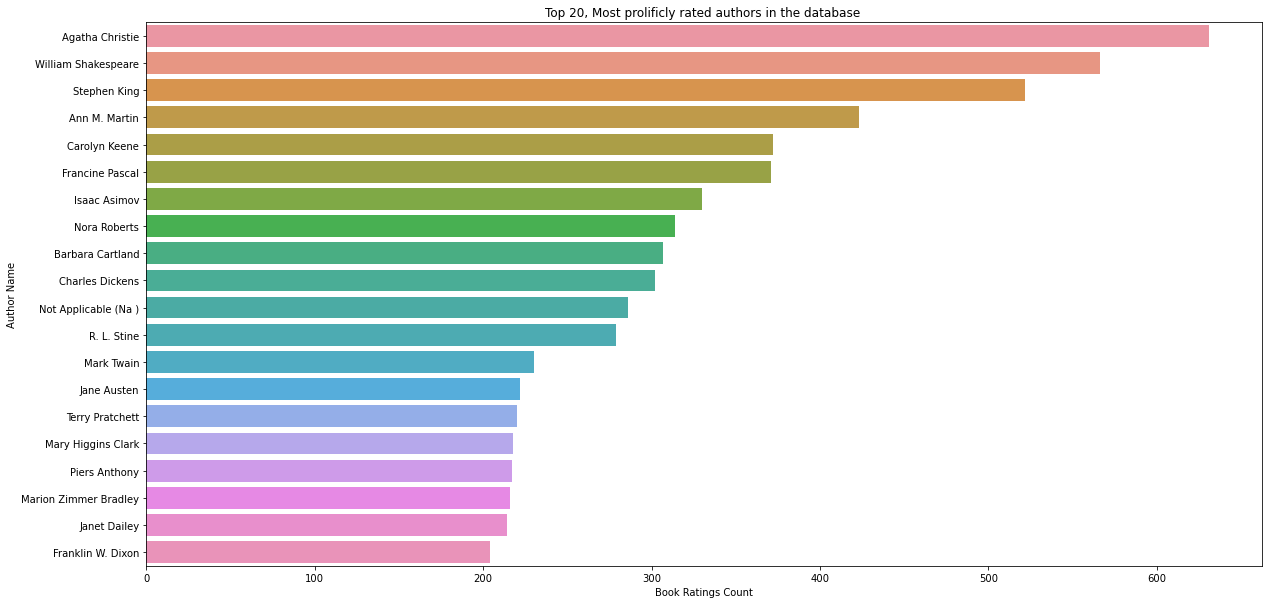

In [70]:
plt.figure(figsize=(20,10))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:20])
plt.title("Top 20, Most prolificly rated authors in the database ")
plt.xlabel("Book Ratings Count")
plt.ylabel("Author Name")

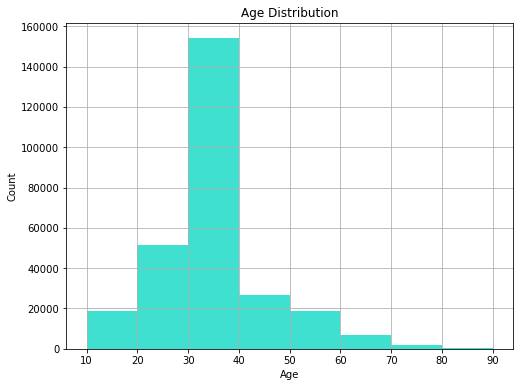

In [71]:
plt.figure(figsize=(8,6))
users.Age.hist(bins=[10*i for i in range(1, 10)], color = 'turquoise')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Rating Count')

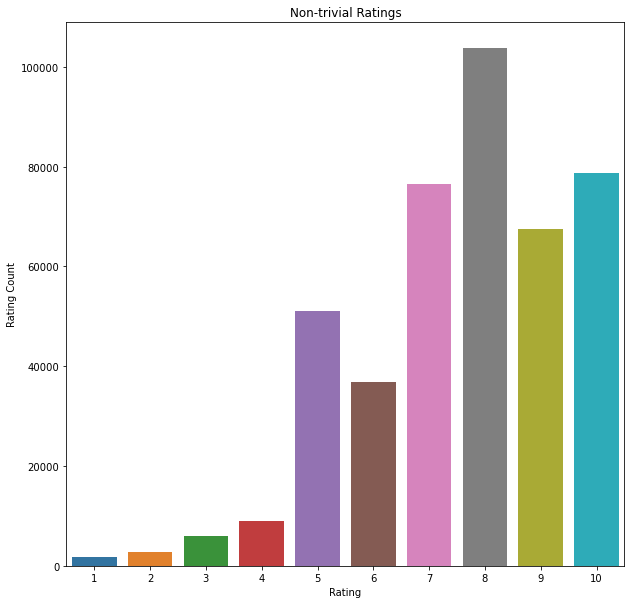

In [72]:
plt.figure(figsize=(10,10))
data = ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Non-trivial Ratings")
plt.xlabel("Rating")
plt.ylabel("Rating Count")

Text(0, 0.5, 'Publisher')

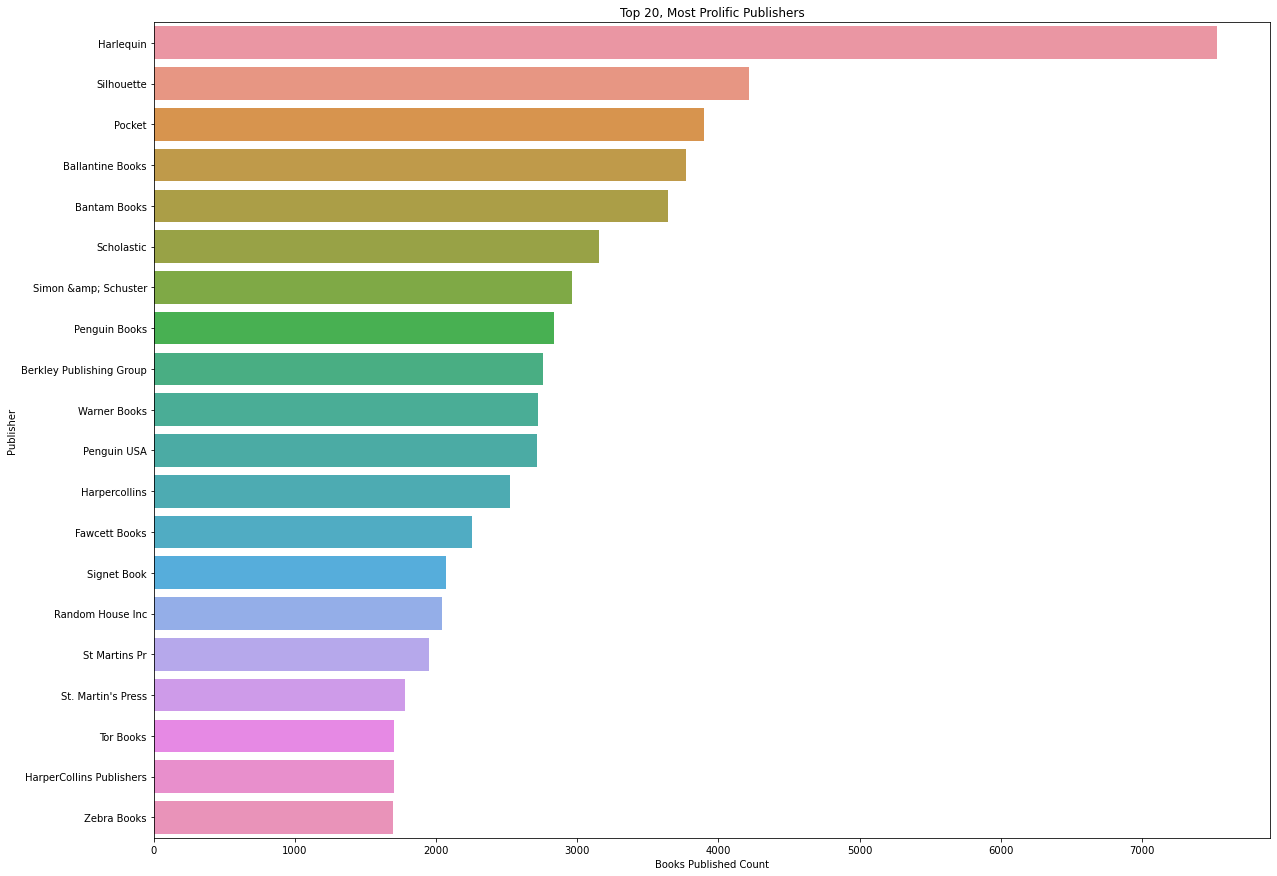

In [73]:
plt.figure(figsize=(20,15))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:20])
plt.title("Top 20, Most Prolific Publishers")
plt.xlabel("Books Published Count")
plt.ylabel("Publisher")

Text(0, 0.5, 'Country')

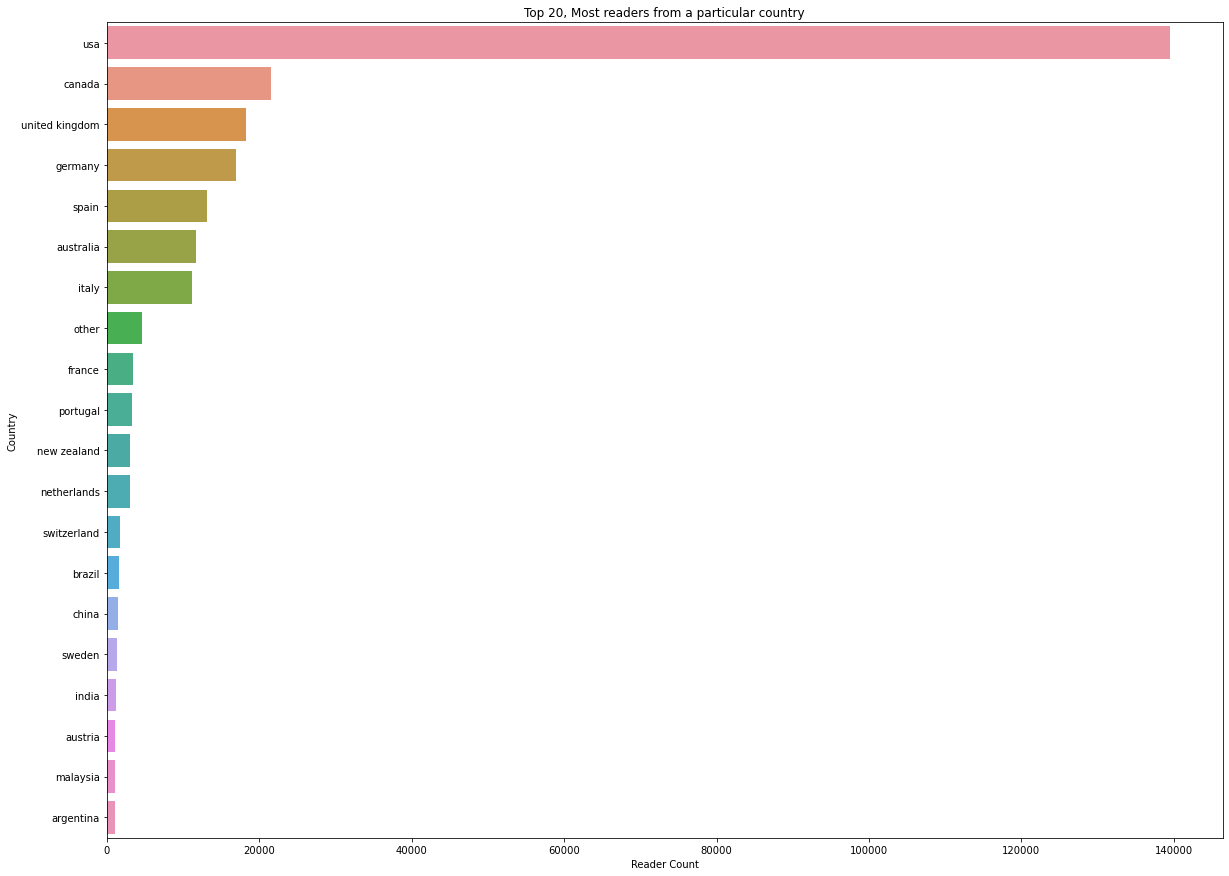

In [74]:
plt.figure(figsize=(20,15))
sns.countplot(y="Country", data=users, order=users['Country'].value_counts().index[0:20])
plt.title("Top 20, Most readers from a particular country")
plt.xlabel("Reader Count")
plt.ylabel("Country")

Text(0, 0.5, 'City')

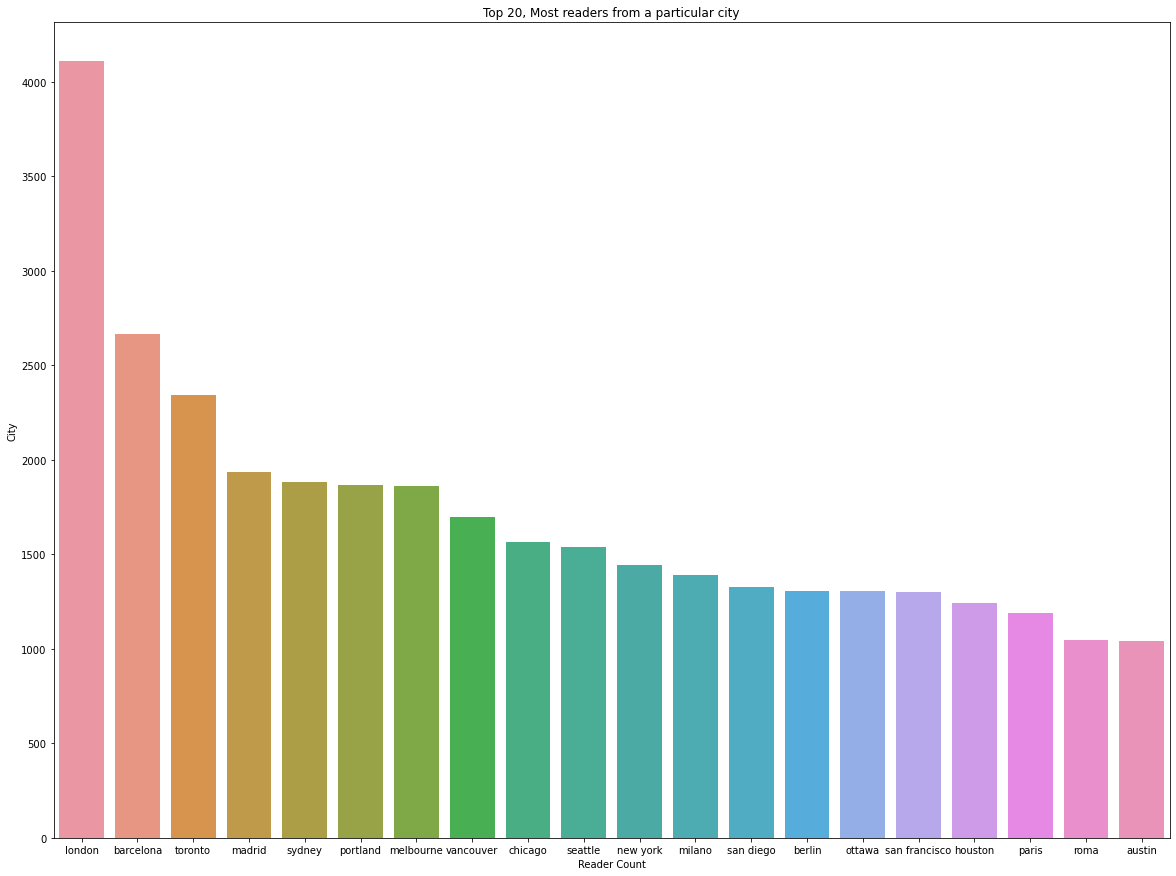

In [75]:
plt.figure(figsize=(20,15))
sns.countplot(x="City", data=users,order=users['City'].value_counts().index[0:20])
plt.title("Top 20, Most readers from a particular city")
plt.xlabel("Reader Count")
plt.ylabel("City")

Text(0, 0.5, 'Book Name')

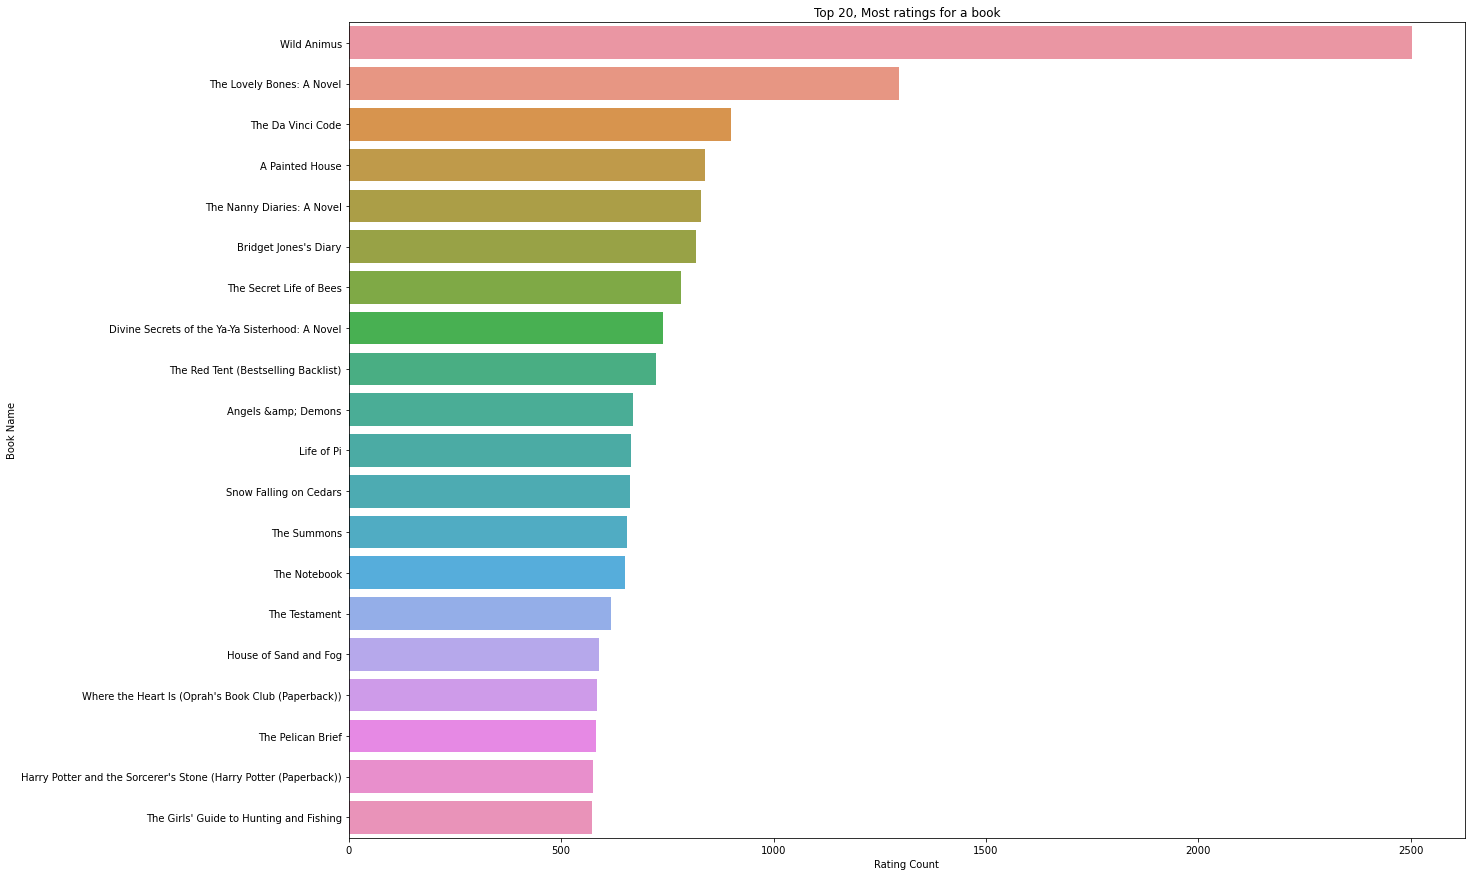

In [76]:
plt.figure(figsize=(20,15))
sns.countplot(y="Book-Title", data=dataset, order=dataset['Book-Title'].value_counts().index[0:20])
plt.title("Top 20, Most ratings for a book")
plt.xlabel("Rating Count")
plt.ylabel("Book Name")